In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df_ob = pd.read_csv('order_book_snapshot.csv')
df_trades = pd.read_csv('trades.csv')

df_trades['timestamp'] = pd.to_datetime(df_trades['timestamp'], unit = 'ns')
df_ob['timestamp'] = pd.to_datetime(df_ob['timestamp'], unit= 'ns')

if not df_ob.empty:
    df_ob['spread'] = df_ob['ask_price_1'] - df_ob['bid_price_1']
    #print(df_ob['spread'])

if not df_trades.empty:
    df_trades_sorted = df_trades.sort_values(by='timestamp').copy()
    print(df_trades_sorted)


sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams['figure.dpi'] = 100





                         timestamp  trade_price  trade_volume direction
0    2025-07-06 10:42:27.343006560     100.0152            33       buy
1    2025-07-06 10:42:27.343503002      99.9838            61      sell
2    2025-07-06 10:42:27.344004101     100.0305            27       buy
3    2025-07-06 10:42:27.344504291      99.9532            14      sell
4    2025-07-06 10:42:27.345008008      99.9305            31      sell
...                            ...          ...           ...       ...
1995 2025-07-06 10:42:28.340501296      99.9953            69      sell
1996 2025-07-06 10:42:28.341004270     100.0588            66       buy
1997 2025-07-06 10:42:28.341506982      99.9786             5       buy
1998 2025-07-06 10:42:28.342010025      99.9152            56      sell
1999 2025-07-06 10:42:28.342507967      99.9278            79       buy

[2000 rows x 4 columns]


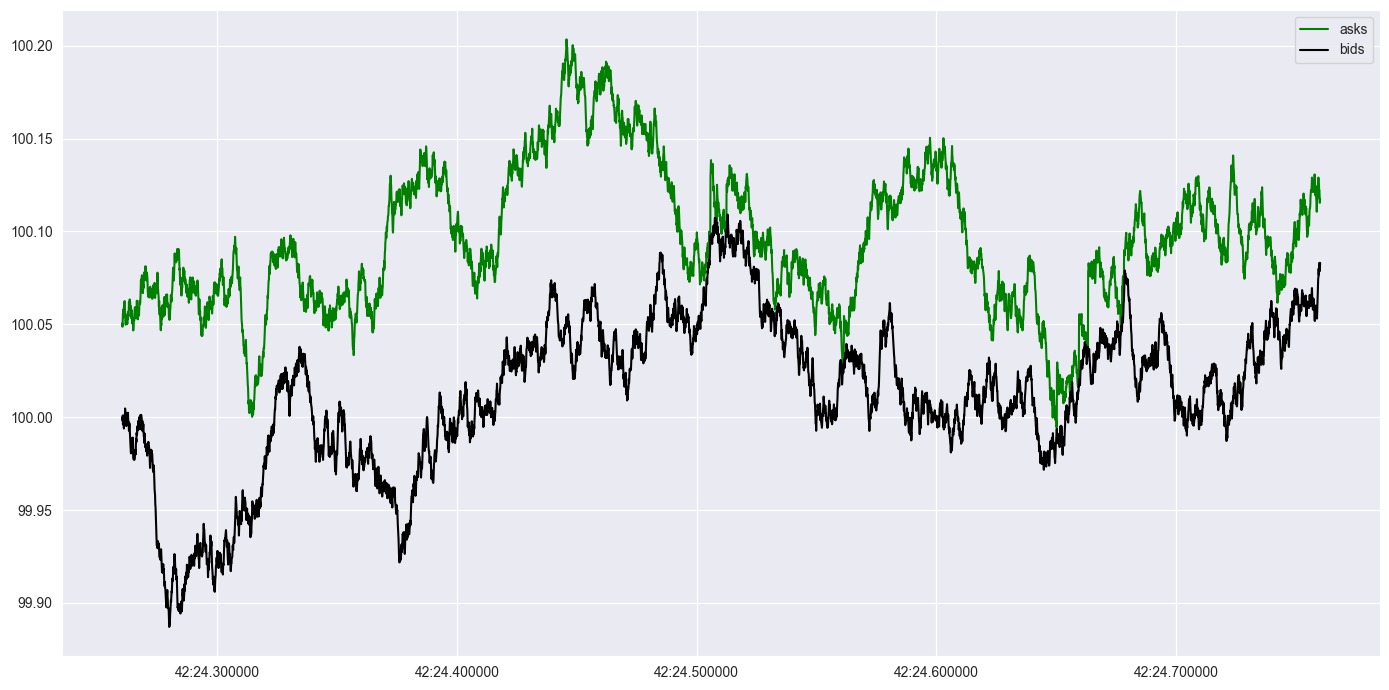

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df_ob['timestamp'], df_ob['ask_price_1'], label='asks', color='green')
plt.plot(df_ob['timestamp'], df_ob['bid_price_1'], label='bids', color='black')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


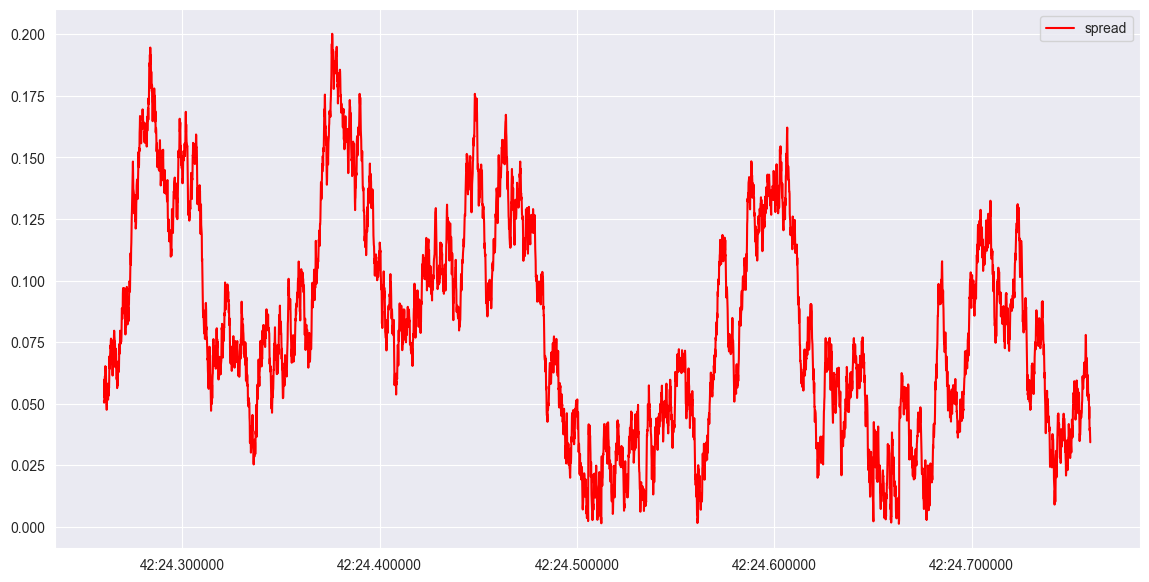

In [19]:

plt.figure(figsize=(14, 7))
plt.plot(df_ob['timestamp'], df_ob['spread'], label='spread', color='red')
plt.legend()
plt.show()

/var/folders/5_/t6j4c_393llc2ffbkjsdr9mr0000gn/T/ipykernel_1406/719138869.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


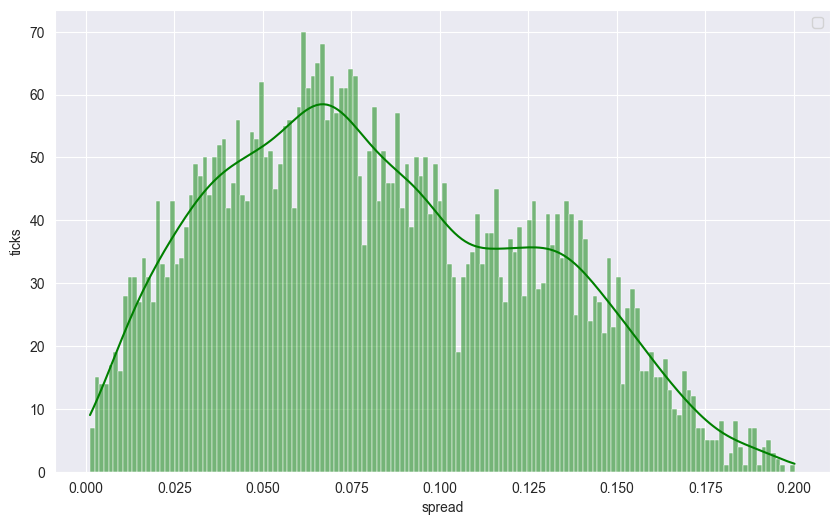

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(df_ob['spread'], bins=150, kde=True, color='green')
plt.legend()
plt.grid(True)
plt.ylabel('ticks')
plt.show()

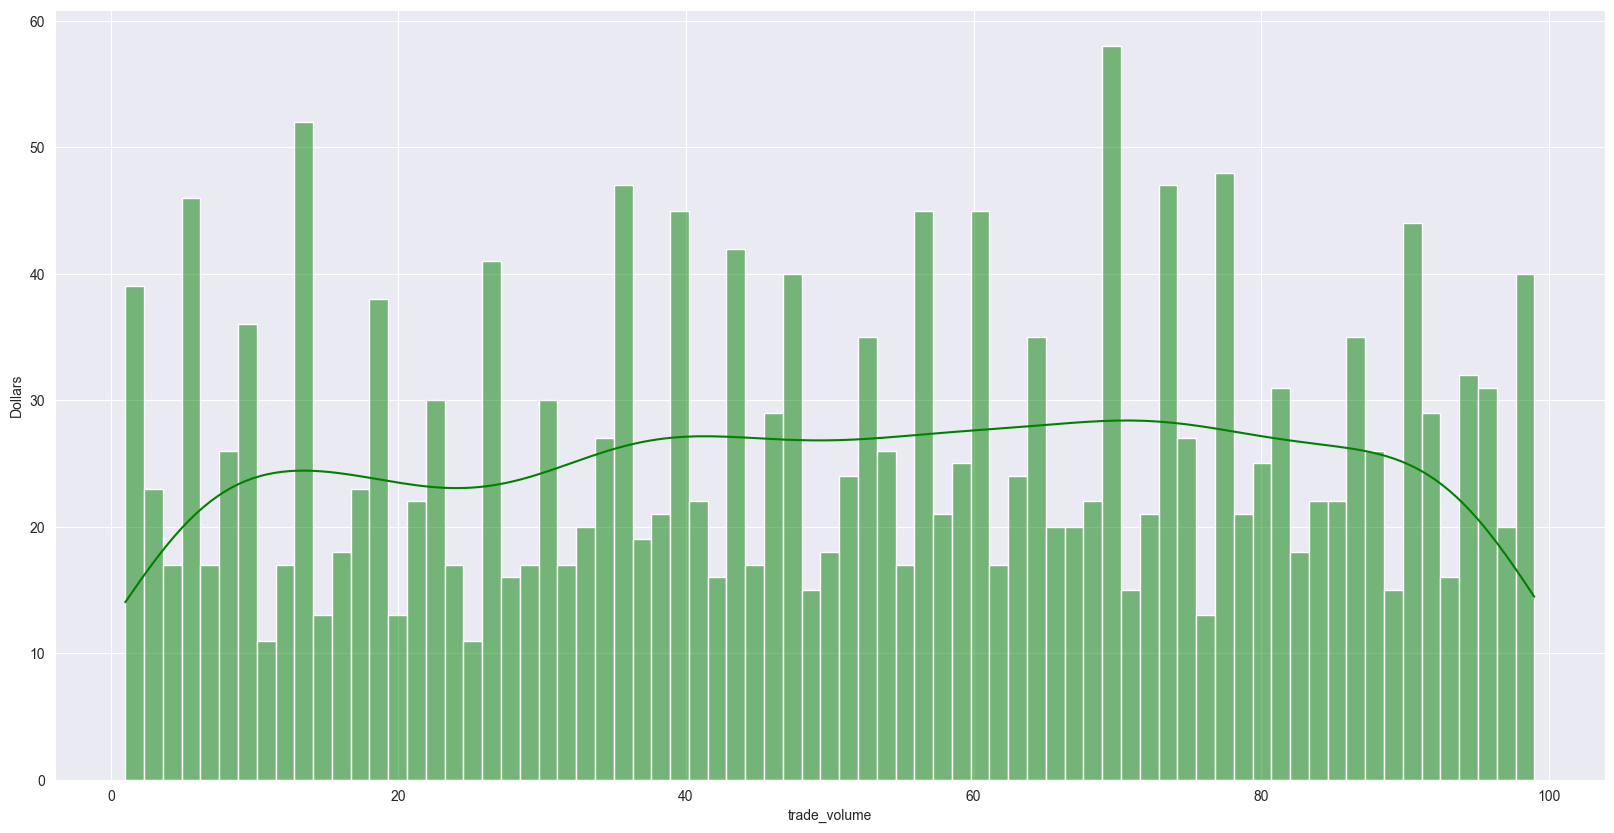

In [53]:
plt.figure(figsize=(20, 10))
sns.histplot(df_trades['trade_volume'], bins=75, kde=True, color='Green')
plt.ylabel('Dollars')
plt.show()


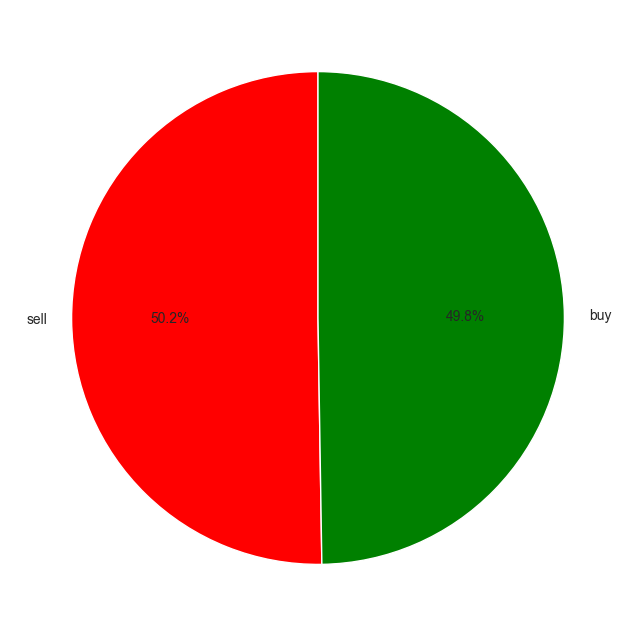

In [46]:
direction_counts = df_trades['direction'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(direction_counts, labels=direction_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.show()

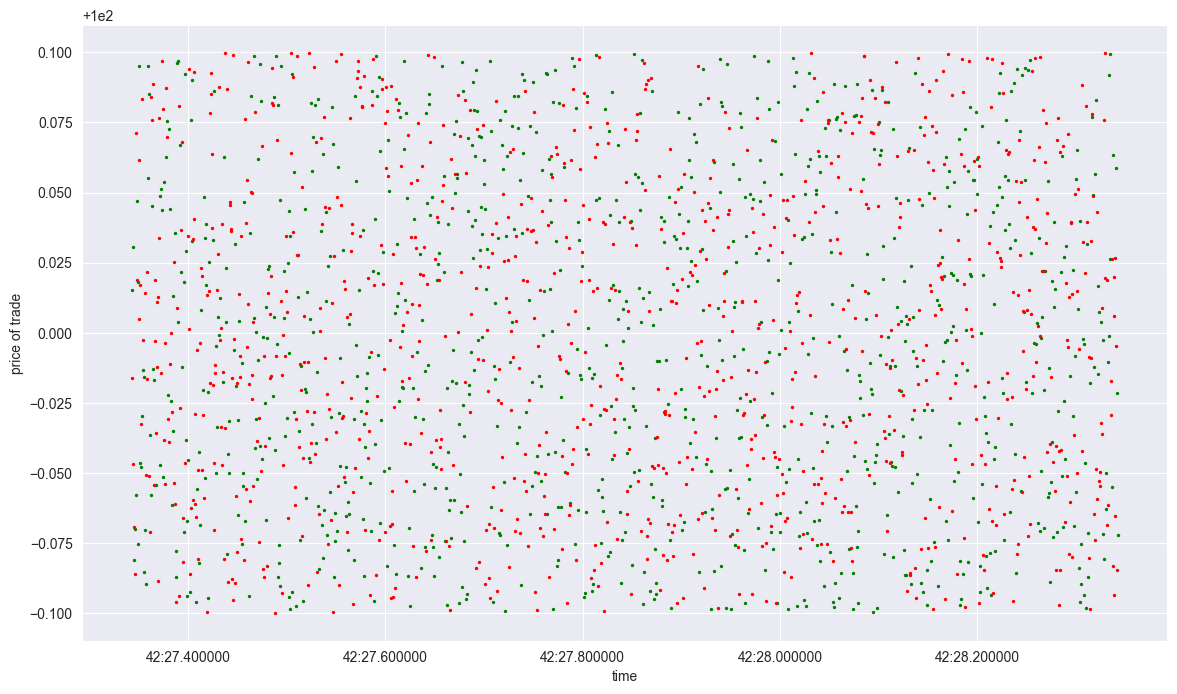

In [71]:
plt.figure(figsize=(14, 8))

plt.scatter(df_trades_sorted[df_trades_sorted['direction'] == 'buy']['timestamp'],
            df_trades_sorted[df_trades_sorted['direction'] == 'buy']['trade_price'],
            color='green', s=2)
plt.scatter(df_trades_sorted[df_trades_sorted['direction'] == 'sell']['timestamp'],
            df_trades_sorted[df_trades_sorted['direction'] == 'sell']['trade_price'],
            color='red', s=2)

plt.ylabel('price of trade')
plt.xlabel('time')
plt.show()